## Kalman Filter for Sensor Fusion

## Idea Of ​​The Kalman Filter In A Single-Dimension

Kalman filters are discrete systems that allows us to define a dependent variable by an independent variable, where by we will solve for the independent variable so that when we are given measurements (the dependent variable),we can infer an estimate     of the independent variable assuming that noise exists from our input measurement and noise also exists in how we’ve modeled the world with our math equations because of inevitably unaccounted for factors in the non-sterile world.Input variables become more valuable when modeled as a system of equations,ora  matrix, in order to make it possible to determine the relationships between those values. Every variables in every dimension will contain noise, and therefore the introduction of related inputs will allow weighted averaging to take place based on the predicted differential at the next step, the noise unaccounted for in the system,and the noise introduced by the sensor inputs.

In [294]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sb
from scipy import stats
import time
from numpy.linalg import inv

In [295]:
%matplotlib inline
fw = 10 # figure width

##  *Despite noisy measurement of individual sensors, We can calculate an optimal estimate of all conditions*.

### https://in.udacity.com/course/artificial-intelligence-for-robotics--cs373

#### Plot the Distributions in this range:

In [296]:
x = np.linspace(-100,100,1000)

In [297]:
mean0 = 0.0   # e.g. meters or miles
var0  = 20.0

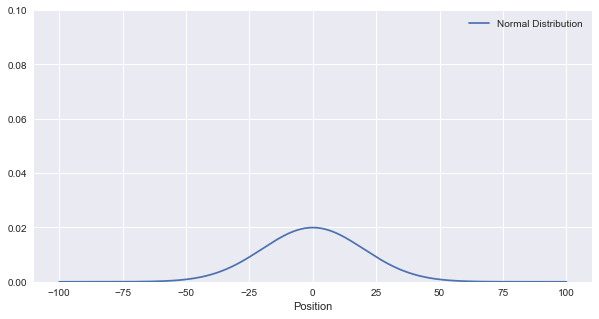

In [298]:
plt.figure(figsize=(fw,5))
plt.plot(x,mlab.normpdf(x, mean0, var0), label='Normal Distribution')
plt.ylim(0, 0.1);
plt.legend(loc='best');
plt.xlabel('Position');

## Now we have something, which estimates the moved distance

#### The Mean is  meters, calculated from velocity*dt or step counter or wheel encoder ...

#### VarMove is the Estimated or determined with static measurements

In [299]:
meanMove = 25.0
varMove  = 10.0 

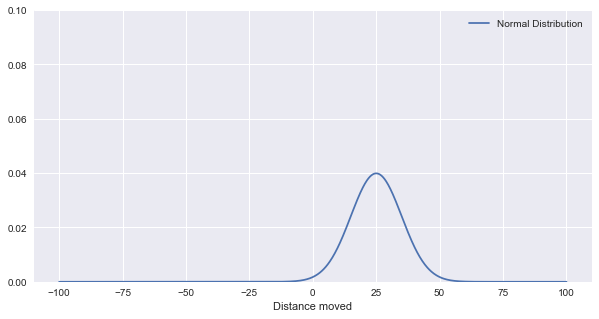

In [300]:
plt.figure(figsize=(fw,5))
plt.plot(x,mlab.normpdf(x, meanMove, varMove), label='Normal Distribution')
plt.ylim(0, 0.1);
plt.legend(loc='best');
plt.xlabel('Distance moved');

Both Distributions have to be merged together
$\mu_\text{new}=\mu_\text{0}+\mu_\text{move}$ is the new mean and $\sigma^2_\text{new}=\sigma^2_\text{0}+\sigma^2_\text{move}$ is the new variance.



In [301]:
def predict(var, mean, varMove, meanMove):
    new_var = var + varMove
    new_mean= mean+ meanMove
    return new_var, new_mean

In [302]:
new_var, new_mean = predict(var0, mean0, varMove, meanMove)

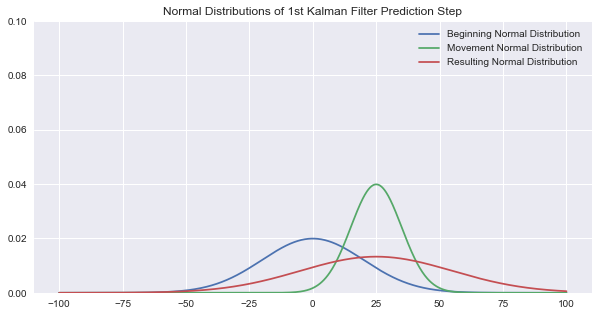

In [303]:
plt.figure(figsize=(fw,5))
plt.plot(x,mlab.normpdf(x, mean0, var0), label='Beginning Normal Distribution')
plt.plot(x,mlab.normpdf(x, meanMove, varMove), label='Movement Normal Distribution')
plt.plot(x,mlab.normpdf(x, new_mean, new_var), label='Resulting Normal Distribution')
plt.ylim(0, 0.1);
plt.legend(loc='best');
plt.title('Normal Distributions of 1st Kalman Filter Prediction Step');
plt.savefig('Kalman-Filter-1D-Step.png', dpi=150)

### What you see: The resulting distribution is flat > uncertain.

The more often you run the predict step, the flatter the distribution get

First Sensor Measurement (Position) is coming in...
#### Sensor Defaults for Position Measurements
(Estimated or determined with static measurements)

In [304]:
meanSensor = 25.0
varSensor  = 12.0

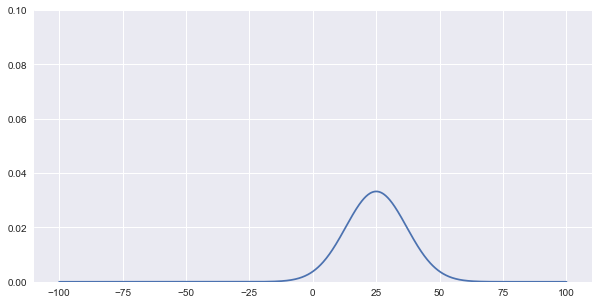

In [305]:
plt.figure(figsize=(fw,5))
plt.plot(x,mlab.normpdf(x, meanSensor, varSensor))
plt.ylim(0, 0.1);

Now both Distributions have to be merged together
$\sigma^2_\text{new}=\cfrac{1}{\cfrac{1}{\sigma^2_\text{old}}+\cfrac{1}{\sigma^2_\text{Sensor}}}$ is the new variance and the new mean value is $\mu_\text{new}=\cfrac{\sigma^2_\text{Sensor} \cdot \mu_\text{old} + \sigma^2_\text{old} \cdot \mu_\text{Sensor}}{\sigma^2_\text{old}+\sigma^2_\text{Sensor}}$

In [306]:
def correct(var, mean, varSensor, meanSensor):
    new_mean=(varSensor*mean + var*meanSensor) / (var+varSensor)
    new_var = 1/(1/var +1/varSensor)
    return new_var, new_mean

In [307]:
var, mean = correct(new_var, new_mean, varSensor, meanSensor)

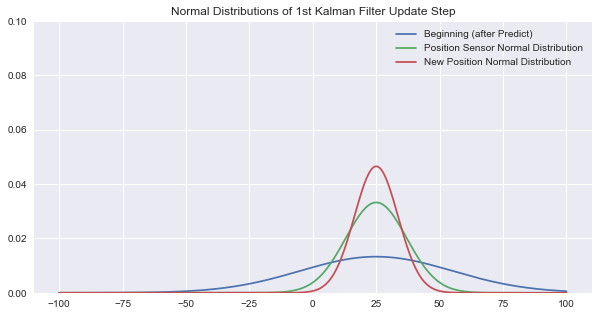

In [308]:
plt.figure(figsize=(fw,5))
plt.plot(x,mlab.normpdf(x, new_mean, new_var), label='Beginning (after Predict)')
plt.plot(x,mlab.normpdf(x, meanSensor, varSensor), label='Position Sensor Normal Distribution')
plt.plot(x,mlab.normpdf(x, mean, var), label='New Position Normal Distribution')
plt.ylim(0, 0.1);
plt.legend(loc='best');
plt.title('Normal Distributions of 1st Kalman Filter Update Step');

###### This is called the Measurement or Correction step! The Filter get's more serious about the actual state.

#### Let's put everything together: The 1D Kalman Filter
"Kalman-Filter: Predicting the Future since 1960"

Let's say, we have some measurements for position and for distance traveled. Both have to be fused with the 1D-Kalman Filter.

In [309]:
positions = (10, 20, 30, 40, 50)+np.random.randn(5)
distances = (10, 10, 10, 10, 10)+np.random.randn(5)

In [310]:
positions

array([ 10.80787218,  19.82024685,  30.24995934,  40.83244351,  49.49697058])

In [311]:
distances

array([  9.27854437,  10.25773141,   7.81942752,   8.19073928,   8.61443343])

After correction:  mean= 20.02	var= 7.29
After correction:  mean= 24.10	var= 7.08
After correction:  mean= 30.94	var= 7.05
After correction:  mean= 40.13	var= 7.04
After correction:  mean= 49.19	var= 7.04


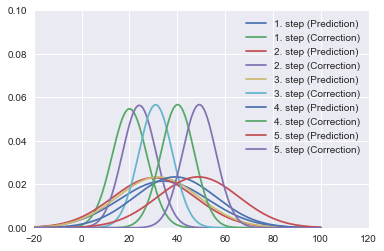

In [312]:
for m in range(len(positions)):
    
    # Predict
    var, mean = predict(var, mean, varMove, distances[m])
    #print('mean: %.2f\tvar:%.2f' % (mean, var))
    plt.plot(x,mlab.normpdf(x, mean, var), label='%i. step (Prediction)' % (m+1))
    
    # Correct
    var, mean = correct(var, mean, varSensor, positions[m])
    print('After correction:  mean= %.2f\tvar= %.2f' % (mean, var))
    plt.plot(x,mlab.normpdf(x, mean, var), label='%i. step (Correction)' % (m+1))
    
plt.ylim(0, 0.1);
plt.xlim(-20, 120)
plt.legend();


The sensors are represented as normal distributions with their parameters ($\mu$ and $\sigma^2$) and are calculated together with addition or convolution. The prediction decreases the certainty about the state, the correction increases the certainty.

Prediction: Certainty $\downarrow$
Correction: Certainty $\uparrow$

## Kalman Filter - Multi-Dimensional Measurement

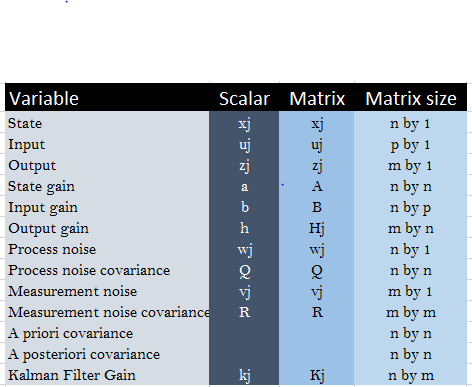

#### Multidimensional Kalman filter


Let's assume we drive our car  into a tunnel. The GPS signal is gone. Nevertheless, we might want to get notified that should  exit in the tunnel.The procedure is using the example of a vehicle with navigation device, which enters a tunnel. The last known position is before losing the GPS signal. Afterwards (with permanently installed Navis) only the speed information of the vehicle (wheel speeds & yaw rate) is available as normal distributed noisy measured variable. From this a velocity in x and y can be calculated. 

#### *How would we know now where we are right now? 

##### *It merges the vehicle sensors and calculates the position as well as possible.*



Now lets think, when we were at the tunnel entrance last and drive at 50km / h, then the car can indeed calculated exactly where (x = position) you are 1 minute (t = time) later


So far the perfect world. But the calculation takes over a microcontroller and this relies on sensors. Both the sensors have random errors, the transmission path has interference, and the resolution of CAN bus or analog-to-digital converters can cause many inaccuracies in the simple statement "speed". For example, a speed signal looks like this:

Speed-time course of a measurement
Speed-time course of a measurement

On average, the measured speed is already correct, but there is some "noise". If one calculates a histogram of the determined speeds, one sees that the determined values ​​are approximately subject to a normal distribution.

Histogram of measured velocity with normal distribution
Histogram of measured velocity with normal distribution

So there is one, and really only one, maximum value (unimodal) and a spread (variance). If this is the case, you can do the calculation very well with a trick nevertheless.




### State Vector
Constant Velocity Model for Ego Motion

$$x_k= \left[ \matrix{ x \\ \dot x \\ } \right] = \matrix{ \text{Position X}  \\ \text{Velocity in X} \\ }$$


In [313]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

x = np.matrix([[0.0, 0.0]]).T
print(x, x.shape)
#plt.scatter(float(x[0]),float(x[1]), s=100)
#plt.title('Initial Location')

[[ 0.]
 [ 0.]] (2, 1)


In [314]:
P = np.diag([100, 9])
print(P, P.shape)


[[100   0]
 [  0   9]] (2, 2)


## Using Matplotlib to understand the P matrix More:

The value of the vectors on the x,y and $\dot x$, $\dot y$ is very high. Thus the intial position and velocity is very uncertain

While plotting the matrix, make sure we label:
1. Setting the locations of the yticks
2. Setting the locations and labels of the yticks
3. Setting the locations of the yticks
4. Setting the locations and labels of the yticks


## Covariance matrix $P$

An uncertainty must be given for the initial state  x0 . In the 1D case, the σ0 , now a matrix, defines an initial uncertainty for all states.

This matrix is ​​most likely to be changed during the filter passes. It is changed in both the Predict and Correct steps. If one is quite sure about the states at the beginning, one can use low values ​​here, if one does not know exactly how the values ​​of the state vector are, the covariance matrix should be Pinitialized with very large values ​​(1 million or so) to allow the filter to converge relatively quickly (find the right values ​​based on the measurements).




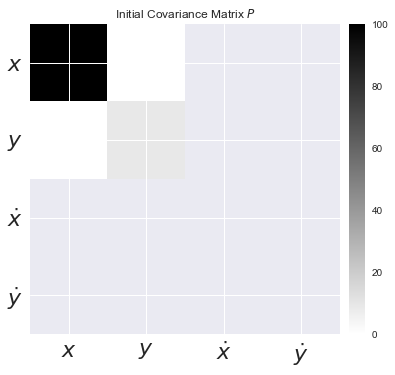

In [315]:
fig = plt.figure(figsize=(6, 6))
im = plt.imshow(P, interpolation="none", cmap=plt.get_cmap('binary'))
plt.title('Initial Covariance Matrix $P$')
ylocs, ylabels = plt.yticks()
plt.yticks(np.arange(7))
# 
plt.yticks(np.arange(6),('$x$', '$y$', '$\dot x$', '$\dot y$'), fontsize=22)
xlocs, xlabels = plt.xticks()
# 
plt.xticks(np.arange(7))

plt.xticks(np.arange(6),('$x$', '$y$', '$\dot x$', '$\dot y$'), fontsize=22)

plt.xlim([-0.5,3.5])
plt.ylim([3.5, -0.5])

from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%")
plt.colorbar(im, cax=cax);


#### Dynamics matrix A
The core of the filter, however, is the following definition, which we would set up yourself only with great understanding of the physical context. This is not easy for many real problems. For our simple example (in-plane motion), the physics behind it comes from the smooth motion. The position results in xt + 1= x˙t⋅ t + xt and in velocity x˙t + 1= x˙t . For the state vector shown above, the dynamics in matrix notation is as follows:


This states "where" the state vector moves from one calculation step to the next within dt . This dynamic model is also called a "constant velocity" model because it assumes that the velocity remains constant during a filter's calculation step.


As an example, only the first line is written out, which calculates the position after a calculation step with the duration dt .

## *xt + 1= xt+ dt ⋅ x˙t*
This simply reflects physical relationships for the uniform motion. A higher form would be the Constant Acceleration model, which would be a 6D filter and still includes the accelerations in the state vector. In principle, other dynamics can be specified here (eg a  holonomic vehicle ).

#### Initial conditions / initialization
System state x
At the beginning you have to initialize with an initial state. In the 1 Dimensional case, μ0 , now in the multidimensional, was a vector.

If nothing is known, you can simply enter 0 here. If some boundary conditions are already known, they can be communicated to the filter. The choice of the following covariance matrix P controls how fast the filter converges to the correct (measured) values.

 ### Time Step between Filter Steps $dt$

In [316]:
dt = 0.1

### Measurement Matrix $H$


The filter must also be told what is measured and how it relates to the state vector. In the example of the vehicle, what enters a tunnel, only the speed, not the position! The values ​​can be measured directly with the factor 1 (ie the velocity is measured directly in the correct unit), which is why in only 1.0 is set to the appropriate position.H

In [317]:
A = np.matrix([[1, dt],[0,1]])
print(A, A.shape)



B = np.matrix([[0.5*dt],[dt]])
print(B, B.shape)


H = np.matrix([[1.0, 0.0],
              [0.0,  1.0]])
print(H, H.shape)

[[ 1.   0.1]
 [ 0.   1. ]] (2, 2)
[[ 0.05]
 [ 0.1 ]] (2, 1)
[[ 1.  0.]
 [ 0.  1.]] (2, 2)


### Measurement Noise Covariance $R$

Measurement noise covariance matrix R
As in the one-dimensional case the variance , a measurement uncertainty must also be stated here.σ0


This measurement uncertainty indicates how much one trusts the measured values ​​of the sensors. Since we measure only $\dot x$ and  $\dot y$ , this is a 2 × 2 matrix. If the sensor is very accurate, small values ​​should be used here. If the sensor is relatively inaccurate, large values ​​should be used here for  $\dot x$, $\dot y$

In [318]:
ra = 10.0**2

R = np.matrix([[ra, 0.0],
              [0.0, ra]])
print(R, R.shape)

[[ 100.    0.]
 [   0.  100.]] (2, 2)


#### Plot between -10 and 10 with .001 steps.

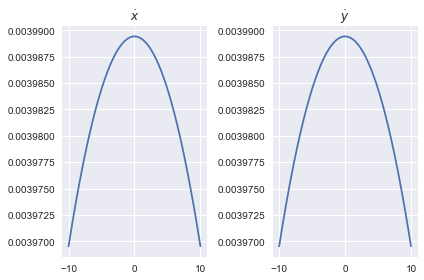

In [319]:
xpdf = np.arange(-10, 10, 0.001)
plt.subplot(121)
plt.plot(xpdf, norm.pdf(xpdf,0,R[0,0]))
plt.title('$\dot x$')

plt.subplot(122)
plt.plot(xpdf, norm.pdf(xpdf,0,R[1,1]))
plt.title('$\dot y$')
plt.tight_layout()

In [320]:
sv = 8.8

#G = np.matrix([[0.5*dt**2],
#              [0.5*dt**2],
#               [dt],
#               [dt]])

#Q = G*G.T*sv**2
Q = np.matrix([[1, 0],[0, 1]])
print(Q.shape)


(2, 2)


In [321]:
Q 

matrix([[1, 0],
        [0, 1]])

## Unit matrix $I$
Last but not least a unit matrix is ​​necessary.

In [322]:
I = np.eye(2)
print(I, I.shape)

[[ 1.  0.]
 [ 0.  1.]] (2, 2)


## Measurements

(200, 1) u
(200, 1)
Standard Deviation of Acceleration Measurements=1.93
You assumed 100.00 in R.


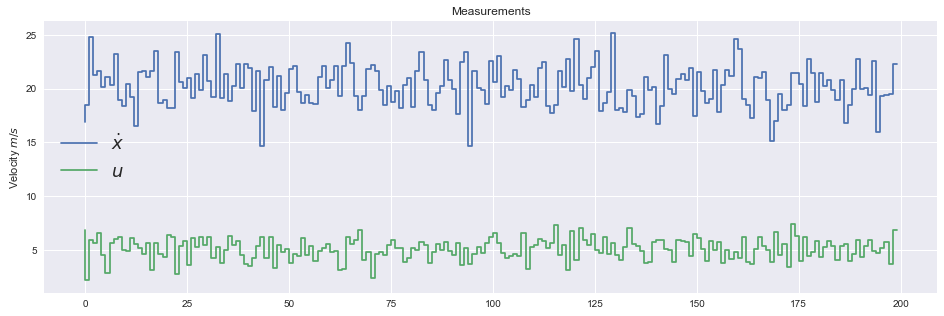

In [323]:
m = 200 # Measurements
vx= 20 # in X
vy= 10 # in Y
acc = 5
u_u  =  np.array(acc+np.random.randn(m))
mx = np.array(vx+2*np.random.randn(m))
my = np.array(vy+2*np.random.randn(m))
u = np.vstack((u_u))
print(u.shape, "u")

measurements = np.vstack((mx))

print(measurements.shape)

print('Standard Deviation of Acceleration Measurements=%.2f' % np.std(mx))
print('You assumed %.2f in R.' % R[0,0])


fig = plt.figure(figsize=(16,5))

plt.step(range(m),mx, label='$\dot x$')
#plt.step(range(m),my, label='$\dot y$')
plt.step(range(m),u_u, label='$u$')
plt.ylabel(r'Velocity $m/s$')
plt.title('Measurements')
plt.legend(loc='best',prop={'size':18})
plt.show()



In [324]:
aer = []
for i in range(len(measurements)):
    i+=1
    aer.append(i)
print (aer)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200]


# Preallocation for Plotting

In [325]:
xt = []
#yt = []
dxt= []
#dyt= []
Zx = []
#Zy = []
Px = []
#Py = []
Pdx= []
#Pdy= []
Rdx= []
#Rdy= []
Kx = []
#Ky = []
Kdx= []
#Kdy= []

def savestates(x, Z, P, R, K):
    xt.append(float(x[0]))
    #yt.append(float(x[1]))
    dxt.append(float(x[1]))
    #dyt.append(float(x[3]))
    Zx.append(float(Z[0]))
    #Zy.append(float(Z[1]))
    Px.append(float(P[0,0]))
    #Py.append(float(P[1,1]))
    Pdx.append(float(P[1,1]))
    #Pdy.append(float(P[3,3]))
    Rdx.append(float(R[0,0]))
    #Rdy.append(float(R[1,1]))
    Kx.append(float(K[0,0]))
    #Ky.append(float(K[1,0]))
    Kdx.append(float(K[1,0]))
    #Kdy.append(float(K[3,0]))  

## Kalman Filter Algorithm

## Filtering step Prediction / Predict
This part of the Kalman filter now dares to predict the state of the system in the future. In addition, under certain conditions (observability) a state can be calculated with it which can not be measured! That's amazing, but in our case exactly what we need. We can not measure the position of the vehicle because the GPS of the navigation device has no reception in a tunnel. By initializing the state vector with a position and measuring the velocity, however, the dynamics still be used to make an optimal prediction about the position.A

#### *xt+1=A⋅xt*

The covariance must also be recalculated. Uncertainty about the state of the system increases in the Predict step, as we have seen in the 1D case. In the multidimensional case, the measurement uncertainty Q is additively added, so the uncertainty P is getting bigger and bigger.PQP

#### *P=A⋅P⋅A‘+Q*

That's it. We have in the future ( ) expected. The Kalman filter has made a statement about the expected system state in the future.dt

Goes by now exactly time and the filter is in measuring / correcting and checking whether the prediction of the system state fits well with the new measurements. If so, the covariance chosen to be smaller by the filter (it is safer), if not, larger (something is wrong, the filter becomes more uncertain).dtP
Filter step Measure / Correct
The following mathematical calculations are not something that one must necessarily be able to derive. Rudolf E. Kalman thought about that in a few quiet minutes and it looks crazy, but works.

From the sensors come current measured values , with which an innovation  the state vector  with the measuring matrix  calculated.

#### *w=Z−(H⋅x)*
Then it is looked at with which variance (which in the multi-dimensional case is called covariance matrix) can be further calculated. For this, the uncertainty and the measurement matrix and the measurement uncertainty required.PHR
S=(H⋅P⋅H′+R)
This determines the so-called Kalman gain. It states whether the readings or system dynamics should be more familiar.

#### *K= P⋅ H'S*
The Kalman Gain will decrease if the readings match the predicted system state. If the measured values ​​say otherwise, the elements of matrix K become larger.

This information is now used to update the system state.

#### *x = x + ( K⋅ w )*
And also determined a new covariance for the upcoming Predict step.

#### *P= ( I- ( K⋅ H) ) ⋅ P*


In [326]:
measurements[1]

array([ 18.49712669])

In [327]:
def kalman_filter(x,P):
    for n in range(len(measurements)): 
        x = A*x + B*u[n]      
        P = A*P*A.T        
        S = H*P*H.T + R
        K = (P*H.T) * np.linalg.pinv(S)       
        Z = measurements[n]
        y = Z - (H*x)                            
        x = x + (K*y)        
        P = (I - (K*H))*P        
        savestates(x, Z, P, R, K)
        print("x:", x)
        print("P:", P)
        print("K:", K)
        print("Z:", Z)


#### The Usual Step :
1.  ##### Time Update (Prediction)
2.  ##### Project the state ahead
3.  ##### Project the error covariance ahead
4.  ##### Measurement Update (Correction)
5.  ##### Compute the Kalman Gain
6.  ##### Update the estimate via z
7.  ##### Update the error covariance
8.  ##### Save states for Plotting


In [328]:
kalman_filter(x,P)

x: [[ 8.70968852]
 [ 2.09771907]]
P: [[ 50.02063368   0.41267367]
 [  0.41267367   8.25347334]]
K: [[ 0.50020634  0.00412674]
 [ 0.00412674  0.08253473]]
Z: [ 16.93424067]
x: [[ 12.31423379]
 [  3.61760869]]
P: [[ 33.40948835   0.76155018]
 [  0.76155018   7.61550178]]
K: [[ 0.33409488  0.0076155 ]
 [ 0.0076155   0.07615502]]
Z: [ 18.49712669]
x: [[ 16.17296086]
 [  5.79215294]]
P: [[ 25.15888584   1.05923892]
 [  1.05923892   7.06159278]]
K: [[ 0.25158886  0.01059239]
 [ 0.01059239  0.07061593]]
Z: [ 24.82515966]
x: [[ 18.08968898]
 [  7.38985687]]
P: [[ 20.26296567   1.31482834]
 [  1.31482834   6.57414171]]
K: [[ 0.20262966  0.01314828]
 [ 0.01314828  0.06574142]]
Z: [ 21.28166656]
x: [[ 19.79223812]
 [  8.92053103]]
P: [[ 17.05042925   1.53505032]
 [  1.53505032   6.14020126]]
K: [[ 0.17050429  0.0153505 ]
 [ 0.0153505   0.06140201]]
Z: [ 21.65750423]
x: [[ 20.97825195]
 [  9.97964675]]
P: [[ 14.80322004   1.72501917]
 [  1.72501917   5.75006389]]
K: [[ 0.1480322   0.01725019]
 [ 0

 [ 18.38255512]]
P: [[ 5.24561411  1.23560568]
 [ 1.23560568  0.43354585]]
K: [[ 0.05245614  0.01235606]
 [ 0.01235606  0.00433546]]
Z: [ 18.64437814]
x: [[ 52.01845614]
 [ 18.3484102 ]]
P: [[ 5.19600226  1.20727138]
 [ 1.20727138  0.41630048]]
K: [[ 0.05196002  0.01207271]
 [ 0.01207271  0.004163  ]]
Z: [ 18.57320816]
x: [[ 52.42439095]
 [ 18.45354668]]
P: [[ 5.14681596  1.17971163]
 [ 1.17971163  0.39990225]]
K: [[ 0.05146816  0.01179712]
 [ 0.01179712  0.00399902]]
Z: [ 21.09882807]
x: [[ 52.91102127]
 [ 18.61187243]]
P: [[ 5.09807435  1.15291003]
 [ 1.15291003  0.38430334]]
K: [[ 0.05098074  0.0115291 ]
 [ 0.0115291   0.00384303]]
Z: [ 22.07164257]
x: [[ 53.29143829]
 [ 18.77736202]]
P: [[ 5.04979452  1.1268496 ]
 [ 1.1268496   0.36945889]]
K: [[ 0.05049795  0.0112685 ]
 [ 0.0112685   0.00369459]]
Z: [ 20.02139279]
x: [[ 53.69304958]
 [ 18.87971075]]
P: [[ 5.00199158  1.1015129 ]
 [ 1.1015129   0.35532674]]
K: [[ 0.05001992  0.01101513]
 [ 0.01101513  0.00355327]]
Z: [ 20.78015554]

### State Estimate $x$

In [329]:
measurements

array([[ 16.93424067],
       [ 18.49712669],
       [ 24.82515966],
       [ 21.28166656],
       [ 21.65750423],
       [ 20.10751177],
       [ 21.11870043],
       [ 20.32984239],
       [ 23.23847578],
       [ 18.95120644],
       [ 18.40528447],
       [ 20.39525226],
       [ 19.21750929],
       [ 16.54950503],
       [ 21.51493986],
       [ 21.67926195],
       [ 21.099611  ],
       [ 21.60332633],
       [ 23.54224921],
       [ 18.6189339 ],
       [ 18.93312356],
       [ 18.20654035],
       [ 18.22244274],
       [ 23.44491319],
       [ 20.57482718],
       [ 20.02797607],
       [ 20.97958026],
       [ 19.14417477],
       [ 21.39001974],
       [ 19.89301642],
       [ 23.09576724],
       [ 20.75660177],
       [ 19.2266475 ],
       [ 25.05052335],
       [ 19.15441971],
       [ 21.40615512],
       [ 18.84149378],
       [ 20.21143827],
       [ 22.30198372],
       [ 20.02982178],
       [ 22.28854541],
       [ 21.96238298],
       [ 17.95084787],
       [ 21

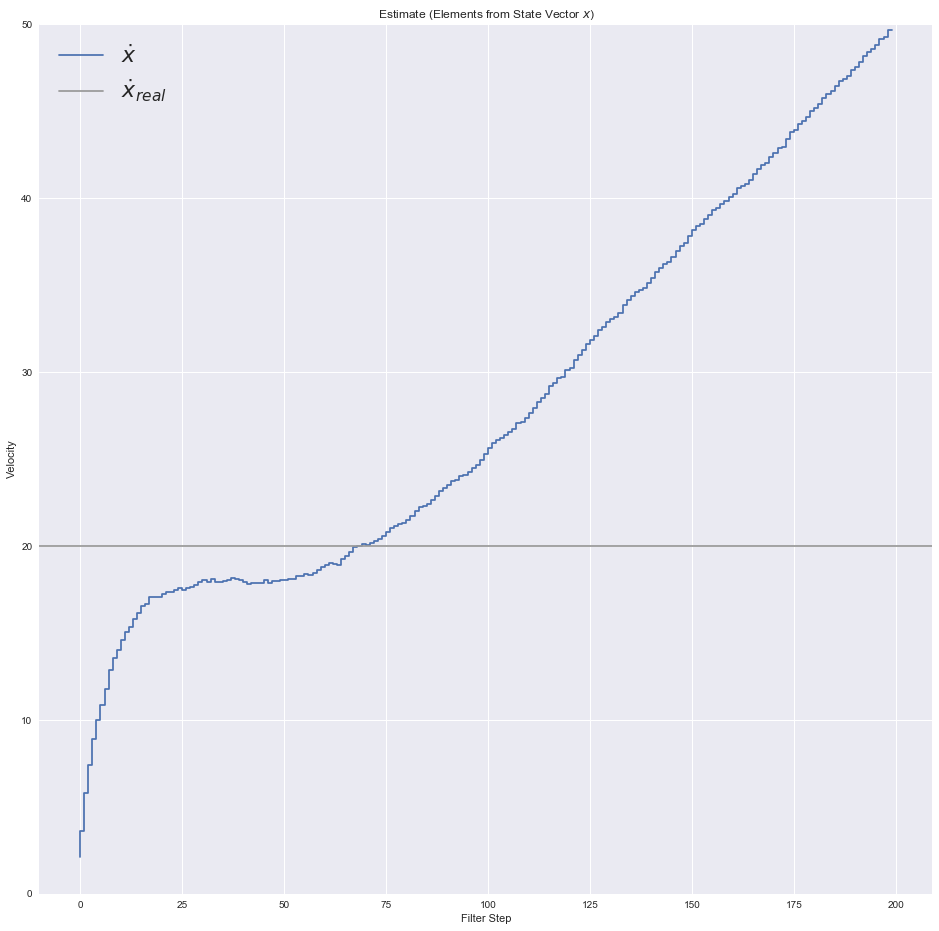

In [330]:
def plot_x():
    fig = plt.figure(figsize=(16,16))
    plt.step(range(200),dxt, label='$\dot x$')
    #plt.step(range(200)),dyt, label='$\dot y$')

    plt.axhline(vx, color='#999999', label='$\dot x_{real}$')
    #plt.axhline(vy, color='#999999', label='$\dot y_{real}$')

    plt.xlabel('Filter Step')
    plt.title('Estimate (Elements from State Vector $x$)')
    plt.legend(loc='best',prop={'size':22})
    plt.ylim([0, 50])
    plt.ylabel('Velocity')



plot_x()

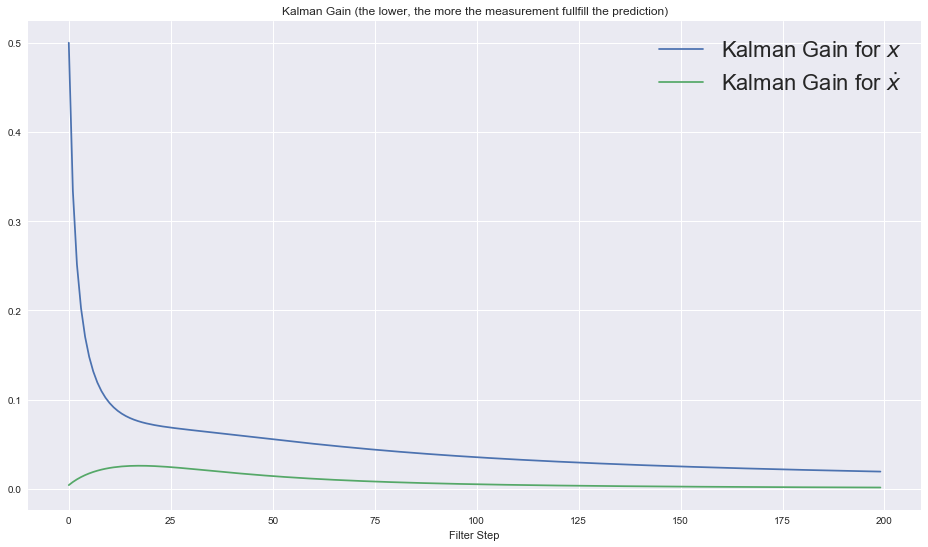

In [331]:
def plot_K():
    fig = plt.figure(figsize=(16,9))
    plt.plot(range(200),Kx, label='Kalman Gain for $x$')
    #plt.plot(range(len(measurements[0])),Ky, label='Kalman Gain for $y$')
    plt.plot(range(200),Kdx, label='Kalman Gain for $\dot x$')
   # plt.plot(range(len(measurements[0])),Kdy, label='Kalman Gain for $\dot y$')

    plt.xlabel('Filter Step')
    plt.ylabel('')
    plt.title('Kalman Gain (the lower, the more the measurement fullfill the prediction)')
    plt.legend(loc='best',prop={'size':22})



plot_K()

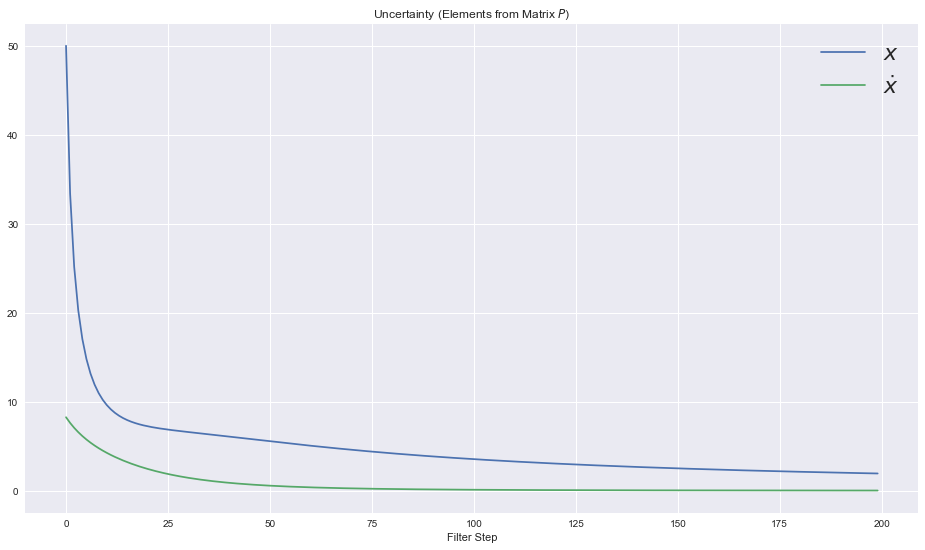

In [332]:
def plot_P():
    fig = plt.figure(figsize=(16,9))
    plt.plot(range(200),Px, label='$x$')
    #plt.plot(range(len(measurements[0])),Py, label='$y$')
    plt.plot(range(200),Pdx, label='$\dot x$')
    #plt.plot(range(len(measurements[0])),Pdy, label='$\dot y$')

    plt.xlabel('Filter Step')
    plt.ylabel('')
    plt.title('Uncertainty (Elements from Matrix $P$)')
    plt.legend(loc='best',prop={'size':22})


plot_P()

In [333]:
print(len(measurements[0]))

1


In [334]:
Pdx

[8.253473336695858,
 7.615501776950413,
 7.061592781482934,
 6.574141709276844,
 6.140201262152482,
 5.750063889598774,
 5.396330495263222,
 5.073280721533259,
 4.776436247843971,
 4.502251125562782,
 4.247887855760608,
 4.011052678491844,
 3.789872618170334,
 3.582802547770701,
 3.3885542168674703,
 3.2060416072955262,
 3.0343385984727167,
 2.8726460261729976,
 2.720265981562642,
 2.5765817348983684,
 2.441042053730048,
 2.3131489667934617,
 2.192448233861145,
 2.07852193995381,
 1.9709827539009028,
 1.8694694861036096,
 1.7736436552825015,
 1.6831868337385445,
 1.5977985886112462,
 1.5171948752528652,
 1.4411067699993587,
 1.3692794547224918,
 1.301471385705505,
 1.2374535954901682,
 1.177009089125743,
 1.1199323063139286,
 1.0660286287910634,
 1.0151139183397238,
 0.9670140754270969,
 0.9215646119189014,
 0.8786102338567563,
 0.838004432112329,
 0.7996090800053299,
 0.7632940378254593,
 0.7289367647356585,
 0.6964219388386771,
 0.6656410863262523,
 0.636492220650636,
 0.608879492600

In [335]:
print(measurements.shape)

(200, 1)


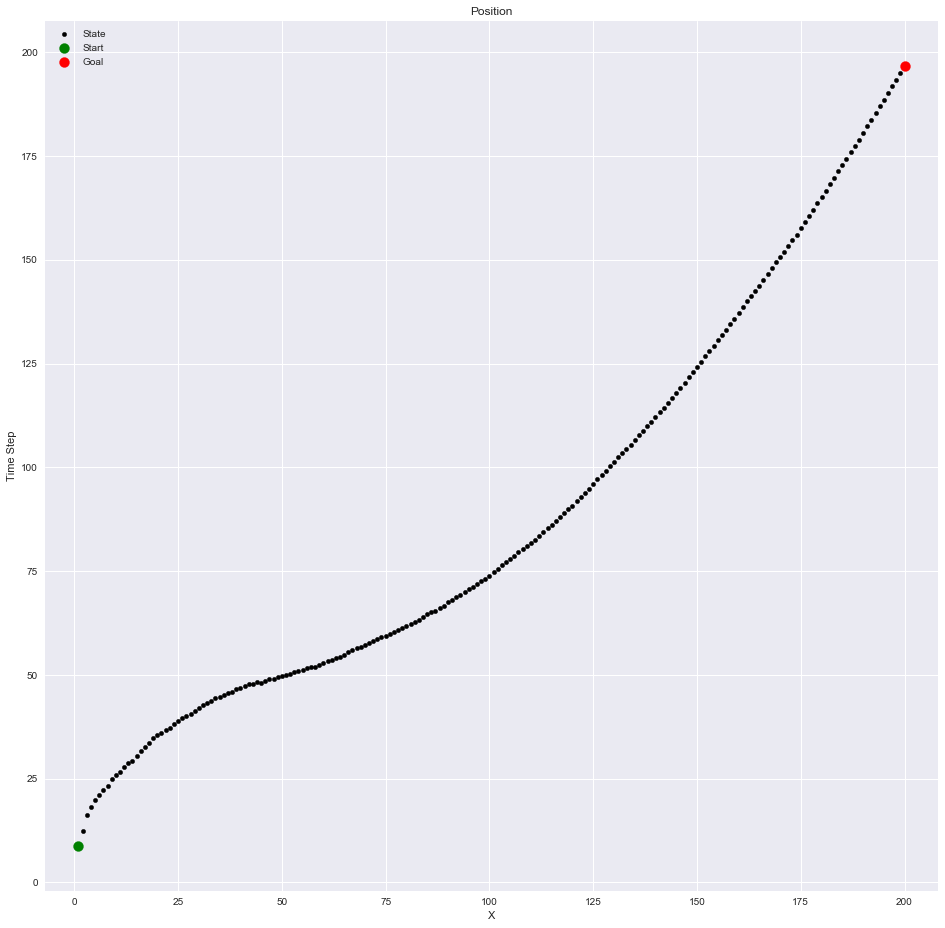

In [336]:
def plot_xy():
    fig = plt.figure(figsize=(16,16))
    
   
    plt.scatter(aer,xt, s=20, label='State', c='k')
    #plt.scatter(rr,i, s=5, label='original', c='b')
    plt.scatter(aer[0],xt[0], s=100, label='Start', c='g')
    plt.scatter(aer[-1],xt[-1], s=100, label='Goal', c='r')

    plt.xlabel('X')
    plt.ylabel('Time Step')
    plt.title('Position')
    plt.legend(loc='best')
    plt.axis('equal')
    
plot_xy()

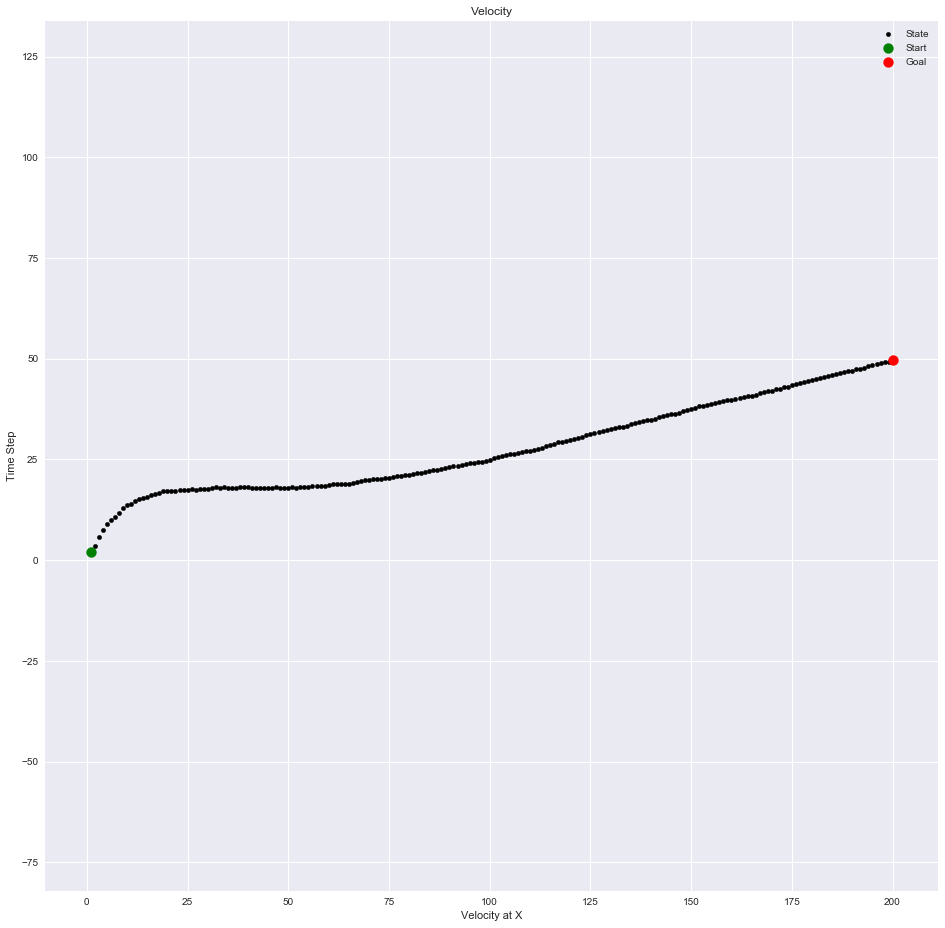

In [337]:
def plot_dxt():
    fig = plt.figure(figsize=(16,16))
    
   
    plt.scatter(aer,dxt,s=20, label='State', c='k')
    #plt.scatter(vx_o[0],vx_o[1], s=5, label='original', c='b')
    plt.scatter(aer[0], dxt[0],s=100, label='Start', c='g')
    plt.scatter(aer[-1], dxt[-1], s=100, label='Goal', c='r')
    
    """""
    plt.scatter(aer,measurements,s=10, label='State', c='y')
    #plt.scatter(vx_o[0],vx_o[1], s=5, label='original', c='b')
    plt.scatter(aer[0], measurements[0],s=100, label='Start', c='g')
    plt.scatter(aer[-1], measurements[-1], s=100, label='Goal', c='r')
    """""
    plt.xlabel('Velocity at X')
    plt.ylabel('Time Step')
    plt.title('Velocity')
    plt.legend(loc='best')
    plt.axis('equal')
    
plot_dxt()

In [ ]:
vx

In [ ]:
dxt

In [ ]:
vy

In [ ]:
dyt

In [ ]:
u = []
for i in range(0,200):
    u.append(i)

In [ ]:
u

### Kalman Filter - Udacity Assignment

In [ ]:
xt = []
yt = []
dxt= []
dyt= []
Zx = []
Zy = []
Px = []
Py = []
Pdx= []
Pdy= []
Rdx= []
Rdy= []
Kx = []
Ky = []
Kdx= []
Kdy= []

In [ ]:
def filter(x, P):
    plt.scatter([x[0]], [x[1]], s=100)
    plt.title('Initial Location')

    for n in range(len(measurements)):

        # prediction
        x = (F * x) + u
        P = (F * P * F.transpose()) + Q
        

        # measurement update
        Z = np.matrix(measurements[n])
        
        y = Z.transpose() - (H * x)
       
        S = H * P * H.transpose() + R
        K = P * H.transpose() * inv(S)
        x = x + (K * y)
        P = (I - (K * H)) * P
               
        xt.append(float(x[0]))
        yt.append(float(x[1]))
        dxt.append(float(x[2]))
        dyt.append(float(x[3]))
        #Zx.append(float(Z[0]))
        #Zy.append(float(Z[1]))
        Px.append(float(P[0,0]))
        Py.append(float(P[1,1]))
        Pdx.append(float(P[2,2]))
        Pdy.append(float(P[3,3]))
        Rdx.append(float(R[0,0]))
        Rdy.append(float(R[1,1]))
        Kx.append(float(K[0,0]))
        Ky.append(float(K[1,0]))
        Kdx.append(float(K[2,0]))
        Kdy.append(float(K[3,0]))
        #print('X:',x)
        #print(P)


dt = 0.1
u = np.matrix([[0.], [0.], [0.], [0.]])
measurements = np.matrix([[5.0, 10.0], [6.0, 8.0], [7.0, 6.0], [8.0, 4.0], [9.0, 2.0], [10.0, 0.0]])
#measurements = np.matrix([[1., 4.], [6., 0.], [11., -4.], [16., -8.]])
#measurements = np.matrix([[1., 17.], [1., 15.], [1., 13.], [1., 11.]])
o = [[5.0, 10.0], [6.0, 8.0], [7.0, 6.0], [8.0, 4.0], [9.0, 2.0], [10.0, 0.0]]

x = np.matrix([[4.], [12.], [0.0], [0.0]])# initial state (location and velocity)
#x = np.matrix([[-4.], [8.], [0.0], [0.0]])
#x = np.matrix([[1.], [19.], [0.0], [0.0]])

P = np.matrix([[0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 1000, 0.0],
              [0.0, 0.0, 0.0, 1000]]) # initial uncertainty: 0 for positions x and y, 1000 for the two velocities

F = np.matrix([[1.0, 0.0, dt, 0.0],
              [0.0, 1.0, 0.0, dt],
              [0.0, 0.0, 1.0, 0.0],
              [0.0, 0.0, 0.0, 1.0]]) # next state function: generalize the 2d version to 4d


H = np.matrix([[1.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0]]) # measurement function: reflect the fact that we observe x and y but not the two velocities

R = np.matrix([[1.0, 0.0], [0.0, 1.0]]) # measurement uncertainty: use 2x2 matrix with 0.1 as main diagonal

I = np.matrix([[1.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0], [0.0, 0.0, 0.0, 1.0]]) # 4d identity matrix

sv = 1.0

G = np.matrix([[dt**2],
               [dt**2],
               [dt],
               [dt]])


Q = G*G.T*sv**2






In [ ]:
filter(x,P)

In [ ]:
fig = plt.figure(figsize=(16,16))
plt.scatter(xt,yt, s=20, label='State', c='k')
plt.scatter(xt[0],yt[0], s=100, label='Start', c='g')
plt.scatter(xt[-1],yt[-1], s=200, label='Goal', c='r')
plt.scatter(o[0][0],o[0][1], s=100, label='Start-measurement', c='y')
plt.scatter(o[-1][0] ,o[-1][1], s=100, label='Goal-measurement', c='y')
for i in range (len(o)):
    plt.scatter(o[i][0],o[i][1], s=20, label='State', c='b')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Position')
plt.legend(loc='best')
plt.axis('equal')

In [ ]:
int(5.5)

In [ ]:
measurements

In [ ]:
xt